<CENTER>
  <header>
    <h1>Pandas Tutorial</h1>
    <h3>EuroScipy, Erlangen DE, August 24th, 2016</h3>
    <h2>Joris Van den Bossche</h2>
    <p></p>
Source: <a href="https://github.com/jorisvandenbossche/pandas-tutorial">https://github.com/jorisvandenbossche/pandas-tutorial</a>
  </header>
</CENTER>

# About me: Joris Van den Bossche

- Researcher at Vrije Universiteit Brussel (VUB), and contractor for Continuum Analytics
- PhD bio-science engineer, air quality research
- pandas core dev

->

- https://github.com/jorisvandenbossche
- [@jorisvdbossche](https://twitter.com/jorisvdbossche)


Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)


# Content of this talk

- Why do you need pandas?
- Basic introduction to the data structures
- Guided tour through some of the pandas features with two case studies: **movie database** and a **case study about air quality**:
    - groupby operation
    - time series manipulation
    - reshaping with stack/unstack


If you want to follow along, this is a notebook that you can view or run yourself:

- All materials (notebook, data, link to nbviewer): https://github.com/jorisvandenbossche/pandas-tutorial
- You need `pandas` >= 0.18.0 (easy solution is using Anaconda), older versions will work for most examples.

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 8

# Let's start with a showcase

## Case study: air quality in Europe

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [2]:
data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True)

In [3]:
data

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN
1990-01-01 03:00:00,NaN,26.0,NaN,NaN
...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

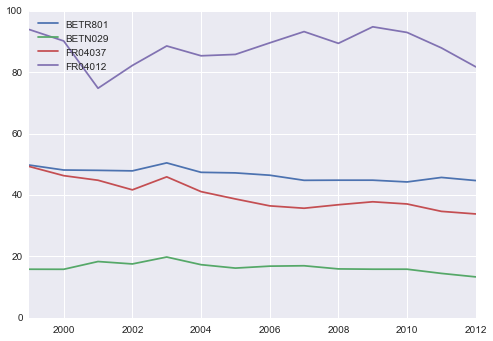

In [4]:
data['1999':].resample('A').plot(ylim=[0,100])

**How many exceedances of the limit values?**



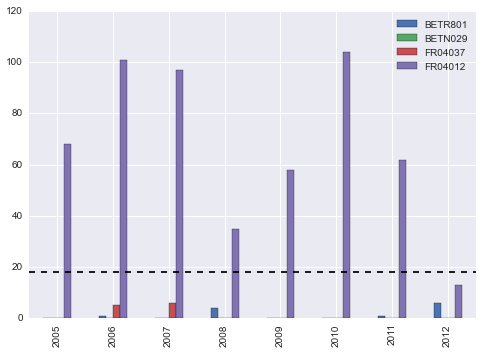

In [5]:
exceedances = data > 200
exceedances = exceedances.groupby(exceedances.index.year).sum()
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

**What is the difference in diurnal profile between weekdays and weekend?**

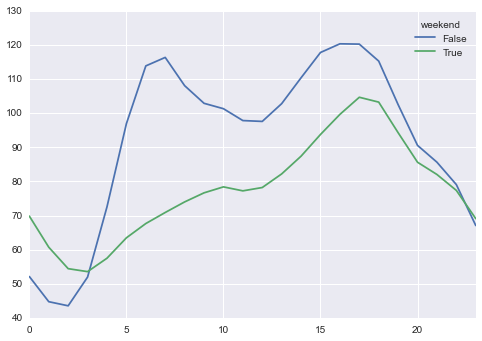

In [6]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['FR04012'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# Why do you need pandas?

## Why do you need pandas?

When working with *tabular or structured data* (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

# Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is ``pandas``?

* Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/

## Key features

* Fast, easy and flexible input/output for a lot of different data formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Powerful time series manipulation (resampling, timezones, ..)
* Easy plotting

# Further reading

- the documentation: http://pandas.pydata.org/pandas-docs/stable/
- Wes McKinney's book "Python for Data Analysis"
- Tom Augspurger's series on modern idiomatic pandas: https://tomaugspurger.github.io/modern-1.html
- Jeff Rebacks talk on Performance Pandas, eg https://github.com/jreback/pydata2015-london or https://github.com/jreback/PandasTalks/tree/master/performance/may_2016 ([slides](http://slides.com/jeffreback/pfq-performance-pandas#/))
- lots of tutorials on the internet, eg http://github.com/jvns/pandas-cookbook, https://github.com/brandon-rhodes/pycon-pandas-tutorial/

# What's new in pandas

Some recent enhancements of the last year (versions 0.17 to 0.18):

- Support for datetime columns that are timezone aware
- Reading of SAS data files
- Unification of the API for `groupby`, `resample`, `rolling` operations
- Support for conditional HTML formatting
- Release the Global Interpreter Lock (GIL) on some cython operations
- And a lot of enhancements and bug fixes

# How can you help?

**We need you!**

Contributions are very welcome and can be in different domains:

- reporting issues
- improving the documentation
- testing release candidates and provide feedback
- triaging and fixing bugs
- implementing new features
- spreading the word

-> https://github.com/pydata/pandas

<div class="alert alert-success">
    <b>JOIN</b> the sprint this Saturday!
</div>

## Thanks for listening! Questions?


- https://github.com/jorisvandenbossche
- <mailto:jorisvandenbossche@gmail.com>
- [@jorisvdbossche](https://twitter.com/jorisvdbossche)


Slides and data: Source: https://github.com/jorisvandenbossche/pandas-tutorial


Slides presented with 'live reveal' https://github.com/damianavila/RISE
